# UMAP Assignment

In [2]:
# Maths and Data
import numpy as np
import pandas as pd
import time

# Plotting
import matplotlib.pyplot as plt

# ML
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import umap

plt.style.use('dark_background')

### 1. Load the dataset and make your preprocessing like normalizing the data.


In [3]:
# fetching data
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

# pulling random 10k observation
np.random.seed(222)
indices = np.random.choice(70000,10000)
X = mnist.data[indices] / 255.0
Y = mnist.target[indices]

print(X.shape, Y.shape)

(10000, 784) (10000,)


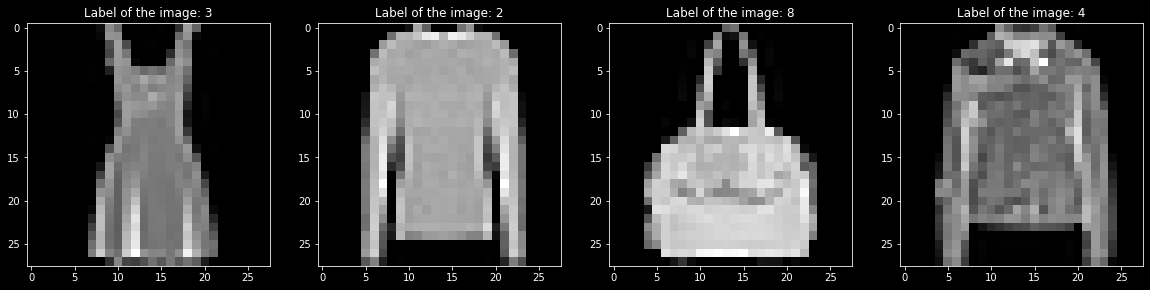

In [3]:
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(Y[123]))

plt.subplot(142)
plt.imshow(X[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(Y[124]))

plt.subplot(143)
plt.imshow(X[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(Y[125]))

plt.subplot(144)
plt.imshow(X[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(Y[126]))

plt.show()

### 2. Apply UMAP to the data.


In [15]:
time_start = time.time()
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 14.480618953704834 seconds


### 3. Using the two-dimensional UMAP representation, draw a graph of the data by coloring and labeling the data points as we did in the checkpoint.


In [16]:

plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(Y[i]),
             color=colours[int(Y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

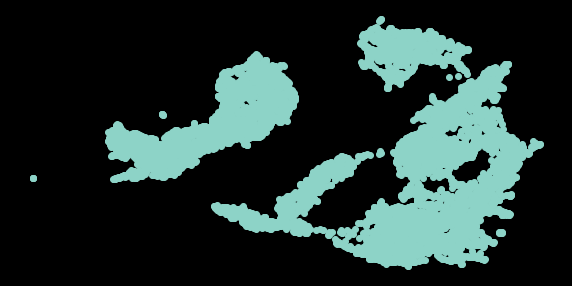

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### 4. Do you think UMAP solution is satisfactory? Can you distinguish between different classes easily? Which one has done a better job: UMAP or the others (t-SNE or PCA) that you applied in the assignments of the previous checkpoints?


Distinguishing between classes is uch easier. UMAP solution has even better separation than t-SNE and PCA

### 5. Now, play with the different hyperparameter values of the UMAP and apply UMAP for each of them. Which combination is the best in terms of the two-dimensional representation clarity?

UMAP neighbors: 3, dist: 0.3


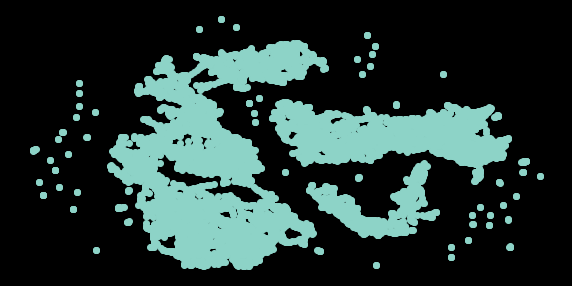



UMAP neighbors: 3, dist: 0.5


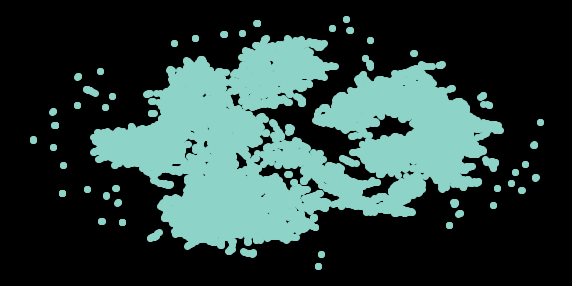



UMAP neighbors: 3, dist: 1.0


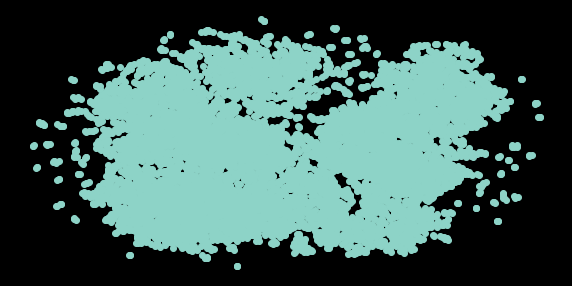



UMAP neighbors: 5, dist: 0.3


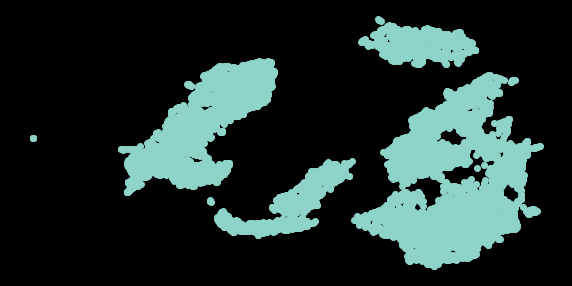



UMAP neighbors: 5, dist: 0.5


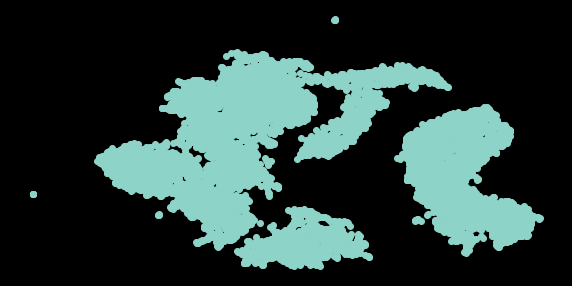



UMAP neighbors: 5, dist: 1.0


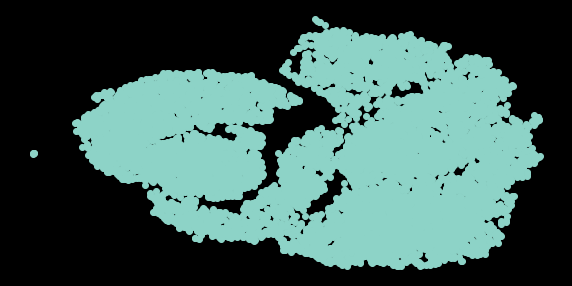



UMAP neighbors: 7, dist: 0.3


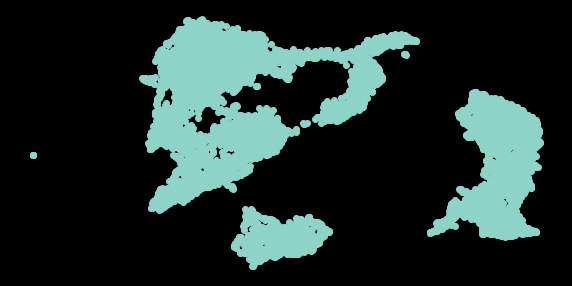



UMAP neighbors: 7, dist: 0.5


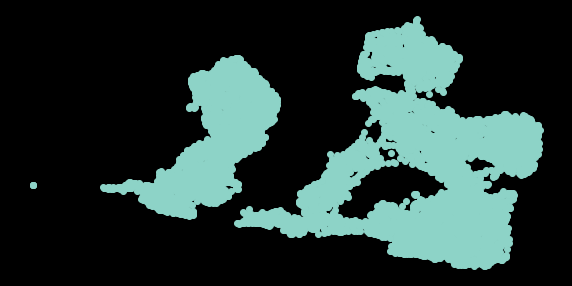



UMAP neighbors: 7, dist: 1.0


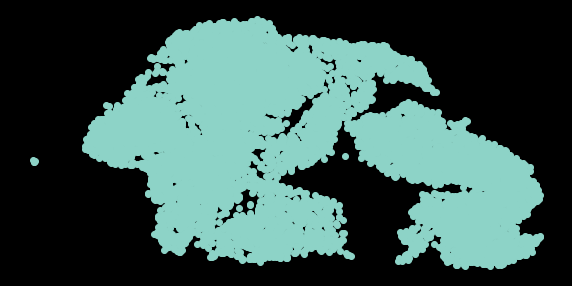

In [23]:
neighbors = [3,5,7]
dist = [0.3, 0.5, 1.0]

for i in neighbors:
    for j in dist:
        umap_results = umap.UMAP(n_neighbors=i, 
                                 min_dist=j, 
                                 metric='correlation').fit_transform(X)

        print(f'UMAP neighbors: {i}, dist: {j}')
        plt.figure(figsize=(10,5))
        plt.scatter(umap_results[:, 0], umap_results[:, 1])
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.show()
        print('\n')



Selections 7/.5 and 5/.5 seem to have the best separation.